In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, LSTM, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

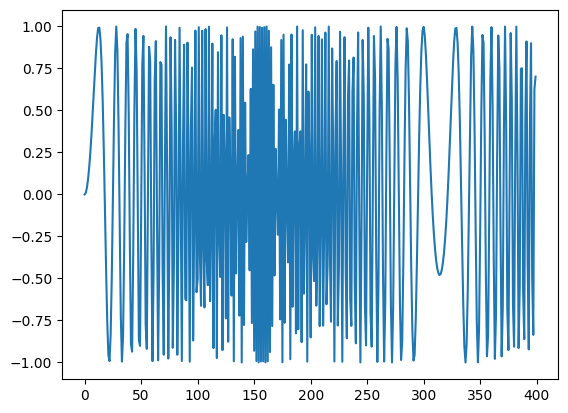

In [3]:
steps = 400
series = np.sin((0.1*np.arange(steps))**2)
#noise = np.random.randn(steps) * 0.1
#series = series+ noise
plt.plot(series);

In [4]:
# Costruiamo il dataset dalla serie
T = 10
D = 1
x = []
y = []
for t in range(len(series) -T):
    piece = series[t:t+T]
    x.append(piece)
    ground_truth = series[t+T]
    y.append(ground_truth)

x = np.array(x).reshape(-1, T, D)
y = np.array(y).reshape(-1, 1)
N = len(x)

x.shape, y.shape

((390, 10, 1), (390, 1))

In [5]:
# RNN "Semplice"
i = Input(shape=(T, D))
out = SimpleRNN(5, activation="tanh")(i)
out = Dense(1)(out)
model = Model(i, out)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=80)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.7593 - val_loss: 0.6337
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5144 - val_loss: 0.4285
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4494 - val_loss: 0.7154
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4406 - val_loss: 0.4078
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2981 - val_loss: 0.3313
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2318 - val_loss: 0.3717
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1585 - val_loss: 0.1926
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1967 - val_loss: 0.1561
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1238 - val_loss: 0.1950
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0954 - val_loss: 0.1960
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0708 - val_loss: 0.1664
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0750 - val_loss: 0.1823
E

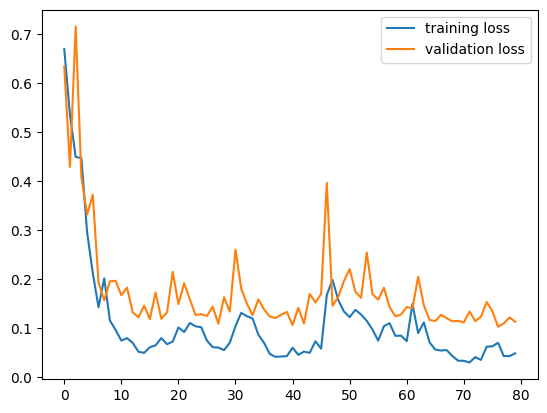

In [7]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

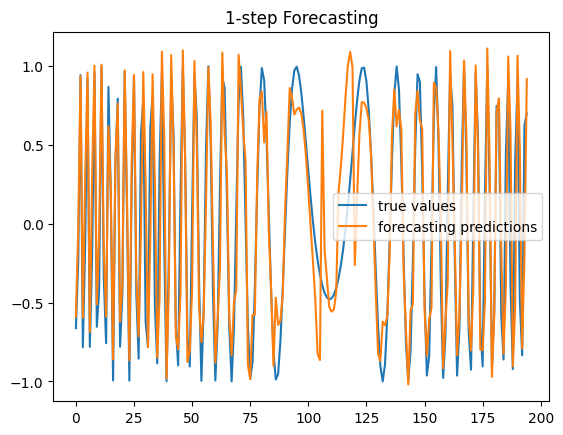

In [8]:
# 1 step forecast
validation_target = y[N//2:]
predictions = []

i = N//2
while len(predictions) < len(validation_target):
    p = model.predict(x[i].reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    i +=1

plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("1-step Forecasting")
plt.legend()

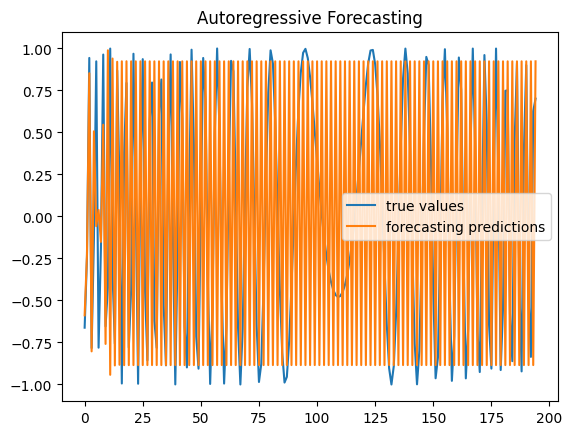

In [9]:
# Forecasting Autoregressivo
validation_target = y[N//2:]
predictions = []

last_x = x[N//2]
while len(predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("Autoregressive Forecasting")
plt.legend()

In [23]:
# LSTM
i = Input(shape=(T, D))
out = LSTM(10, activation="tanh")(i)
out = Dense(1)(out)
model = Model(i, out)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 10, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 10)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
r = model.fit(
    x[:N//2], y[:N//2], validation_data=(x[N//2:], y[N//2:]), epochs=200)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.5061 - val_loss: 0.6087
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5308 - val_loss: 0.5904
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4853 - val_loss: 0.5131
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4404 - val_loss: 0.3896
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3224 - val_loss: 0.3356
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2300 - val_loss: 0.1879
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1291 - val_loss: 0.1391
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0745 - val_loss: 0.0619
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0467 - val_loss: 0.1273
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0656 - val_loss: 0.1093
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0444 - val_loss: 0.0632
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0392 - val_lo

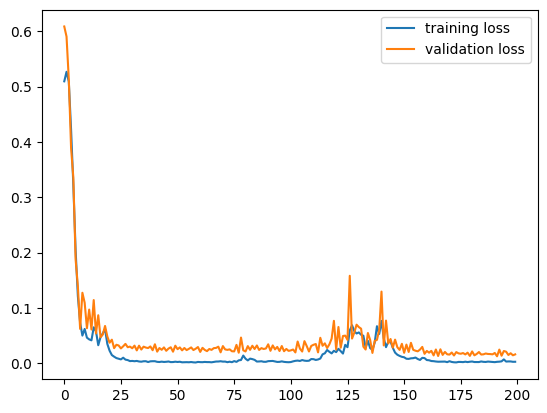

In [25]:
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend();

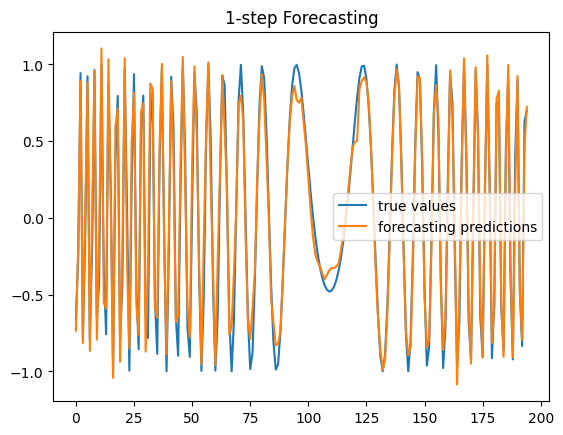

In [26]:
# 1 step forecast
validation_target = y[N//2:]
predictions = []

i = N//2
while len(predictions) < len(validation_target):
    p = model.predict(x[i].reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    i +=1

plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("1-step Forecasting")
plt.legend()

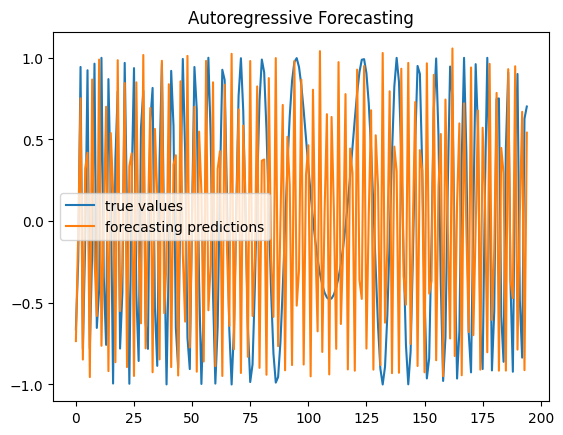

In [30]:
# Forecasting Autoregressivo
validation_target = y[N//2:]
predictions = []

last_x = x[N//2]
while len(predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, D), verbose=False)[0, 0]
    predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label="true values")
plt.plot(predictions, label="forecasting predictions")
plt.title("Autoregressive Forecasting")
plt.legend()